# Effect Size, P-Values and Power - Lab

## Introduction 

It's time to practice your skills regarding effect size, p-values and the power of statistical tests. You'll put all of these ideas together to investigate the design of a statistical experiment for a political campaign.  

## Objectives
You will be able to:
* Describe how effect size, sample size and p_value are related to each other. 
* Use Welch's t-test for distributions that do not have a normality assumption.
* Plot visualisations to confirm the calculations and intuitions towards p_value and effect size. 
* Explain how with a same effect size, we may see different p_values with increasing number of simulations. 

## A Quick Re-cap

What we have learnt from the labs and lessons so far is that scientific results must be presented with a level of uncertainty i.e. a confidence interval e.g. 

*"56% of likely voters prefer candidate A with a **margin of 4 points**. *

we also learnt that the uncertainty from sampling erros errors can be reduced by repeating the experiment. 

For reporting uncertainty, we used hypothesis testing to compare experimental results with the null hypothesis that the results don't exist. This is done because we know that due to random errors, we might see a positive experimental result, *even if no true effect exists*.  Following this thought, The p-value is at the heart of a massive controversy in scientific community with some journals banning hypothesis testing completely. 

In this lab, we shall try to see this phenomenon in action. You would be required to use your existing statistical analysis and plotting abilities to visualise the effect of sample size and effect size on p-value calculation.


## Example Scenario

Suppose you are running clinical tests for a new pharmaceutical drug. In such a situation, you would create a control (placebo) group and a treatment group for running independant t-test. 

Now imagine that your results show the drug has some effect - it lowers the blood pressure for participants in the treatment group. To address uncertainty, you could ask a question like:

>"What is the probability I would see this effect due to random fluctuations if there was actually no effect?" 

Clearly, the Null hypothesis would look like: $μc=μt$. We can also create one-sided alternative hypothesis accordingly, as we saw earlier. 

The analysis of this question leads to p-value calculation using some test statistic to calculate the probability you would see an equal or greater effect under the null hypothesis. We know that when p-value is below some critical value, typically p<0.05, then the result is declared statistically significant and the null hypothesis is rejected.

As a first step, perform following three steps towards generating and visualizing samples for calculating our t-statistic

1. Generate a sample size N=10 from a standard normal distribution (standard normal distribution has a mean 0 and sd of 1). Repeat this twice to simulate control and treatment group.

2. Scale up the samples to make them positive (with mean=0 and sd=1, there are bound to be negative values, shift mean to 2 instead)

3. Plot histograms for both samples. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb


In [2]:
np.random.seed(82)
# Use np.random.randn() to generate two different samples with size N = 10 with mean 2 
a = np.random.randn(10) + 2
b = np.random.randn(10) + 2

Plot overlapping histograms for both samples for visual inspection.

In [3]:
# Plot overlapping histograms for a and b

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


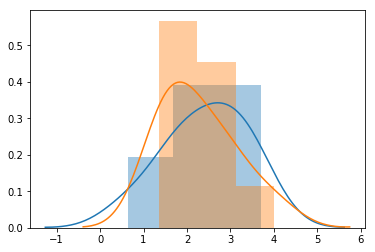

In [4]:
sb.distplot(a)
sb.distplot(b)

## The t-test 

Let's calculate a test statistic, $t$ and compare it with what we would get from the null hypothesis and calculate a p-value.

### Welch's t-Test

The student t-test, we saw earlier assumes the data is normally distributed with samples having equal variance and sample size. There is a more general test that can be used when these assumptions don't hold strong, **Welch's t-test**. 

Here is how you calculate it:
![](http://www.statisticshowto.com/wp-content/uploads/2015/03/Welchs-test-for-unequal-variances.png)

where Xi_bar , s2i, and Ni are the sample mean, sample variance, and sample size, respectively, for sample i.

Welch’s Test for Unequal Variances (also called Welch’s t-test, Welch’s adjusted T or unequal variances t-test) is a modification of a Student’s t-test to see if two sample means are significantly different. There is a modification to the **degrees of freedom** in this test, which tends to increase the test power for samples with unequal variance. When two groups have equal sample sizes and variances, Welch’s tends to give the same result as Student’s t. However, when sample sizes and variances are unequal, Student’s t-test is quite unreliable, whereas Welch’s tends perform better.

Let's write a function for calculatying Welch's t-statistic using two samples generated above:

In [5]:
def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """
    a_mean = a.mean()
    b_mean = b.mean()
    
    a_var = a.var(ddof=1)
    b_var = b.var(ddof=1)
    
    a_len = a.size
    b_len = b.size

    t = (a_mean - b_mean) / np.sqrt((a_var/a_len) + (b_var/b_len))
    
    return t

welch_t(a,b)
# 0.41037468596041143

0.41037468596041143

In [7]:
something = np.array([1,2,3,4,5,6])

### Degree of Freedom
We also need to calculate the effective degrees of freedom using the formula:

![](https://1.bp.blogspot.com/-rawdGLOVCxo/Wp5ju1ei5AI/AAAAAAAABDs/GzCg-sDvrWoZwObatBKoK8-d8QsjNYISACLcBGAs/s1600/Welch-degree%2Bof%2Bfreedom.JPG)

where vi is the degrees of freedom from the first sample and is given by the formula
vi = Ni - 1 for sample i.

Let's write a second function to calculate degree of freedom for above samples:

In [6]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    a_var = a.var(ddof=1)
    b_var = b.var(ddof=1)
    
    a_len = a.size
    b_len = b.size
    
    numerator = ((a_var/a_len) + (b_var/b_len))**2
    
    denom = (a_var**2/((a_len**2) * (a_len-1))) + (b_var**2/((a_len**2) * (a_len-1))) 
    
    df = numerator / denom
    return df
welch_df(a, b)
# 17.86731104513857

17.86731104513857

This result is for two samples (a,b) drawn from the same distribution. We are interested in distribution of t calculated from many samples from same distribution. **This will give us a distribution for comparison with t calculated from real data.**

### T-distribution with Increasing number of trials

Let's plot the distribution of t for increasing number of simulations to give us a sense of what would happen if we could do this infinite times. Expected plot may look something similar to the one shown below:

![](sampleplot.png)


### STEPS:
1. Use the sample size N = 10, mu = 2 and sigma= 1.5
2. Cretae a figure with i subplots (i = number of simulations)
3. Number of Trials (M) = [10,100,1000,10000]
    
    take two samples a,b of shape MxN
    
    for all a_i, b_i in zip(a,b) , calculate the t using welch_t() and collect t in a  numpy array
    
    draw a histogram of collected ts
    
    calculate df with welch_df()
    
    plot a PDF for t distribution with calculated df
    
    label the plots

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead

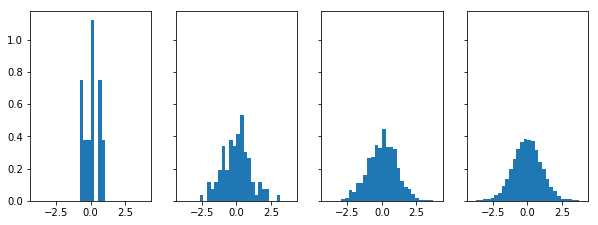

In [7]:
np.random.seed(10)

N = 10 # Sample size
mu, sig = 2, 1.5
fig, axes = plt.subplots(figsize=(10,3.5), ncols=4, sharey=True)
for ax, M in zip(axes, [10, 100, 1000, 10000]):

    # Generate samples as arrays of shape M*N
    a = np.random.randn(M, N)*sig + mu
    b = np.random.randn(M, N)*sig + mu

    # Calculate a set of Welch t values from samples and plot a histogram
    ts = np.array([welch_t(a_i, b_i) for a_i, b_i in zip(a,b)])
    ax.hist(ts, range=(-4,4), bins=30, normed='True', label='Simulation')

    # Calculate Welch df for plotting t distribution


    # Label the plot and axes
    None
    


We see that as the number of simulations gets larger, the distribution of t-statistics becomes closer and closer to the t-distribution with degrees of freedom calculated from the data. We can therefore use the t-distribution as an approximation of this process, as if we had actually performed the simulation infinite times. 

### T-distribution with Increasing number of samples

Let's try to run above simulation with changing size of the sample as [2, 3, 5, 25] and keeping M constant at 10000. 

In [ ]:
np.random.seed(10)
M = 10000 # Simulations
mu, sig = 2, 1.5
fig, axes = plt.subplots(figsize=(10,3.5), ncols=4, sharey=True)
for ax, N in zip(axes, [2, 3, 5, 25]):

        None
    
fig.tight_layout()

We can see that with increasing sample size, the t-distribution can be approximated by a normal distribution with zero mean and a variance of one. 

So how is this used to calculate a p-value? Remember that this is the distribution of t for two samples drawn from the same distribution, and for such situation, the null hypothesis would be **μ1=μ2**.

#### Control and Treatment groups 

In a typical experiment, you will have samples from what you believe is two groups, the control group and the treatment group. Let's simulate some samples for control and treatment group, and calculate t, then go through how to calculate a p-value with following sample data.

In [ ]:
np.random.seed(1)
control = np.random.randn(8)*1.5 + 2
treatment = np.random.randn(12) + 3

Build a scatter plot for control and treatment sample data generated above to visualize the variability.

In [ ]:
# Build a scatter plot to visualize control and treatment groups

calculate welch-t and degree of freedom from these samples using functions developed earlier:

In [ ]:
t = None
df = None
t,df
# (1.325675538604432, 8.95372010421334)

The p-value is the probability we would see a value equal to or more extreme than t, under the null hypothesis. We can find this probability using the t-distribution with degrees of freedom. We shall use a one tailed test which suits our question i.e. drug has a positive effect.

For a one-tailed test, then the p-value is simply equal to the area under the t-distribution that is less than calculated t.

Let's draw a plot to identify the area under curve. Your plot may look similar to the one shown here :

![](AUC.png)

In [ ]:
# Draw the above plot with calculated t value

The easiest way to calculate the shaded area is with the cumulative density function (CDF). 

>The CDF at t is equal to the area under the curve for all values less than t.

In [ ]:
p = None
p
# 0.10888620005627703

In this case, there is a 10% probability we would see t equal to or greater than what we saw from our data. We would not be able to reject the null hypothesis since p is not less than 0.05. 

Building on above code, we can also write a function that calculates the p-value for given samples with a two-sided test by taking advantage of the symmetry of the t-distribution to calculate only one side. The two-tailed p-value is simply twice the one-tailed value, because we want the probability:
>$t<−|t̂|$ and  $t>|t̂|$ , where t̂  is the t-statistic calculated from our data

In [ ]:
def p_value(a, b):

    "Two-sided t-test for two samples a and b."

    t = None
    df = None
    
    p = None

    return t, p

In [ ]:
p_value(treatment, control)

# (1.325675538604432, 0.21777240011255405)

### P_Value and Sample Size

Let's now explore how the p-value depends on sample size and effect size. We will take the effect size as the difference in means between two samples from normal distributions with variances of one. 

Let's write a function to run an experiment with N (sample size), effect size (difference in means) and return the p_value using functions created earlier. 

In [ ]:
def p_experiment(N, effect=1):
    
    control = np.random.randn(N)
    treatment = np.random.randn(N) + effect # Add effect to treatment group
    
    t, p = None
    return p


Using the given values of M and N below, run the above function for effect sizes [0.2, 0.5, 1]. Store the values in an array using formula 

`ps = np.array([sum(simulate_experiment(N, effect_size) for m in range(M))/M for N in Ns])`

In [ ]:
Ns = np.linspace(2,300).astype(int) # Sample sizes
M = 1000 # Simulations

for e_size in [0.2,0.5,1]:
    
    p1 = None
    p2 = None
    p3 = None

For each chosen effect size i.e. .2, .5 and 1, show the effect of sample size on averaged p_value calculated above. An example plot may look like:
![](p-sample-eff.png)

In [ ]:
# Plot the graph similar to one shown above


What we see here is that the p-value is a function of the sample size. This means that regardless of effect size, if you have a large amount of data, you will get a significant p-value. It also means that if you don't have a significant p-value, an effect isn't rejected, you just can't see it through the noise.

### P_Value and Effect Size

We shall now look at how the p-values depend on effect size. We shall simulate experiments to see the distribution of p-values we get with changing effect sizes (as compared to fixed effect size previously).

Use the effect sizes [0.1, 0.25, 0.5, 0.75] with a sample size N = 100 and number of simulations -  M = 10000. Plot a hoistogram of p_values calculated for each effect size. The output may look similar to:
![](p_eff.png)


In [ ]:
fig, axes = plt.subplots(figsize=(12,3), ncols=4, sharey=True)
effect_sizes = [0.1, 0.25, 0.5, 0.75]


It can be seen from the second set of simulations with an effect of 0.25, that If this same experiment were replicated in multiple labs in multiple locations, the chance that one particular experiment would find a statistically significant effect is about the same as getting heads from a coin flip. 

In [ ]:
for i, each in enumerate(effects):
    print('Effect = {}, P(p < 0.05): {}'.\
          format(effect_sizes[i], (np.array(each) < 0.05).mean()))


## Summary

This lesson summarizes and further builds upon the ideas that we saw in the previous labs. We learnt how p_value can be described as a function of effect size and for a given effect size, the p_value may get lower if we increase the sample size considerably. We also saw how p_value alone can not be used in order to identify some results as truly siginifcant, as this can be achieved when there is not a significant effect size. 